In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

,EEG.F7,EEG.F3,EEG.FC5,EEG.FC6,EEG.F4,EEG.F8
0,4256.410156,4222.179688,4226.153809,4220.641113,4252.563965,4116.153809
1,4250.000000,4222.307617,4223.461426,4218.846191,4254.487305,4111.025879
2,4233.846191,4213.717773,4202.051270,4199.871582,4238.846191,4103.333496
3,4243.205078,4215.128418,4212.563965,4202.436035,4239.102539,4109.871582
4,4262.051270,4222.436035,4243.077148,4217.307617,4259.102539,4122.179688


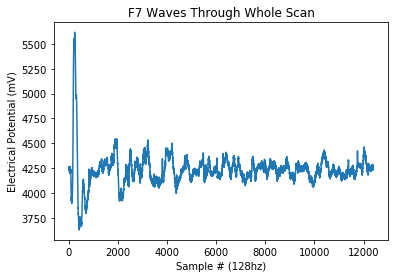

In [5]:
df = pd.read_csv('garbage_data.csv')
plt.plot(df['EEG.F7'])
plt.title('F7 Waves Through Whole Scan')
plt.xlabel('Sample # (128hz)')
plt.ylabel('Electrical Potential (mV)')

frontal_signals = df[['EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.FC6', 'EEG.F4', 'EEG.F8']]
frontal_numpy = frontal_signals.values

frontal_signals.head()

Lowest Frequency:  0.005163788930127481


Text(0.5, 1.0, 'Cropped Fourier Transform of 12394 Samples')

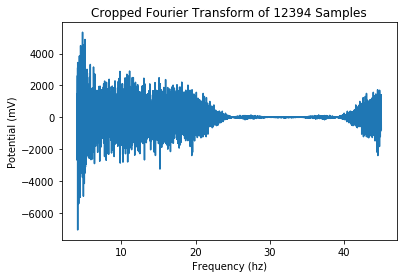

In [19]:
######################################################################
### Getting a cropped and adjusted fourier transform of the waves! ###
######################################################################

# Sample information variables
sample_length = len(frontal_signals['EEG.F7']) # number of samples
sample_rate = 128 # hertz
lower_bound = 4 # hertz
upper_bound = 45

# Calculating the lowest frequency (in a fourier transform the buckets go up by that amount every time too)
lowest_freq = sample_rate/(2*sample_length)
print('Lowest Frequency: ', lowest_freq)

lowest_bucket = int(lower_bound/lowest_freq)
highest_bucket = int(upper_bound//lowest_freq)

# Taking the fourier transform of the signals and cropping it to the proper buckets
cropped_transform = np.fft.fft(frontal_signals['EEG.F7'][0:sample_length])[lowest_bucket:highest_bucket].real

# Creating proper frequency labels
frequency_labels = np.arange(len(cropped_transform))
frequency_labels = frequency_labels.astype('float')
frequency_labels *= (upper_bound-lower_bound)/len(frequency_labels)
frequency_labels += 4

# Plotting
plt.plot(frequency_labels, cropped_transform)
plt.xlabel('Frequency (hz)')
plt.ylabel('Potential (mV)')
plt.title('Cropped Fourier Transform of {} Samples'.format(sample_length))

Range of 0 to 1588 with a difference of 1588.
Average value for this bucket is -10.76223222557244
Range of 1588 to 3176 with a difference of 1588.
Average value for this bucket is 43.623891304508994
Range of 3176 to 4764 with a difference of 1588.
Average value for this bucket is 0.4034196959992313
Range of 4764 to 6352 with a difference of 1588.
Average value for this bucket is 8.036863769332177
Range of 6352 to 7940 with a difference of 1588.
Average value for this bucket is 7.850021915704435


<BarContainer object of 5 artists>

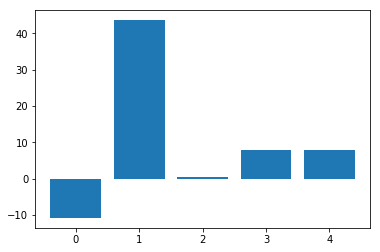

In [27]:
######################################################
### Averaging the buckets of the fourier transform ###
######################################################

num_buckets = 5
bucket_size = len(cropped_transform)//num_buckets

bucketed = []

for i in range(0, len(cropped_transform), bucket_size):
    print("Range of {} to {} with a difference of {}.".format(i, i+bucket_size, bucket_size))
    print("Average value for this bucket is {}".format(cropped_transform[i:i+bucket_size].mean()))
    bucketed += [cropped_transform[i:i+bucket_size].mean()]

plt.bar(np.arange(len(bucketed)), bucketed)